**Complete the code in the blocks below. Do not alter blocks that indicate that they should not be changed.**

**Look for blocks that say "FILL IN THIS SECTION"**

FILL IN THIS SECTION

Author(s): Emilio Cardenas, Deautaun Ross, Johan Olvera, Theodore Weller

In this homework we will be using be using Machine Learning techniques provided by SciKit Learn to investigate home prices in California

In [ ]:
# Add imports here as necesary
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor

from matplotlib import pyplot as plt

import numpy as np

Our first job is to retrieve the [California Housing](https://https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

We also need to split our dataset into a training set and a test set. The test set will **only** be used to test a trained model. Everything else should be done with the train set.

In [ ]:
# Do Not Change!
# Import the California Housing dataset

ds = fetch_california_housing()
X = ds.data     # capital X
y = ds.target   # lowercase y
features = ds.feature_names

# Scaling data keeps features with bigger values from appearing "more important"
# E.g. Median Income will reaonably be much bigger than the average # of bedrooms
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)
maxes = scaler.data_max_

# 20% train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

print(f'Shape of train data: {X_train.shape}')
print(f'Shape of train targets: {y_train.shape}')
print(f'Shape of test data: {X_test.shape}')
print(f'Shape of test targets: {y_test.shape}')
print(f'Features present in data: {features}')

Shape of train data: (16512, 8)
Shape of train targets: (16512,)
Shape of test data: (4128, 8)
Shape of test targets: (4128,)
Features present in data: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


FILL IN THIS SECTION

Answer the following questions by reading the provided documentation for this dataset:

1.   What does the AveOccup feature record?
    - The AveOccup feature records the average number of household members per dwelling in a block group. This represents how many people, on average, live in each household within the specified geographic area.
2.   What are the targets in this dataset? Would classification or regression be the most appropriate task for this dataset?
    - The target in this dataset is the median house value for California districts, expressed in hundreds of thousands of dollars. Given that the target variable is a continuous numerical value (house prices), regression would be the most appropriate machine learning task for this dataset. Regression is used when predicting a continuous outcome variable based on one or more feature variables.
3.   Of the 8 features recorded in these data, which do you expect to be the most useful?
    - Based on preliminary understanding, "MedInc" (median income in block group) may be the most useful predictor for housing prices. Generally, there is a strong positive correlation between the income levels of residents in an area and the value of homes in that area. Higher median income typically corresponds to higher house values due to the increased buying power of the residents, and the ability to afford more expensive housing. Additionally, "Latitude" and "Longitude" could be crucial as they pinpoint the exact location, from which one can derive proximity to key amenities, urban centers, desirability of the area, etc., all of which are important in determining house values.



[Principal Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) is a tool for reducing the dimensionality data. Consider that it would be very difficult to plot the original 8-dimensionl data (you would need X, Y, Z, W... so on axes).

In the Code block below, fit the PCA object to the X_train array store the transformed X_train array into a new array called **X_reduced**.

**Do not overwrite X_train!**

Size of transformed X_train: (16512, 2)


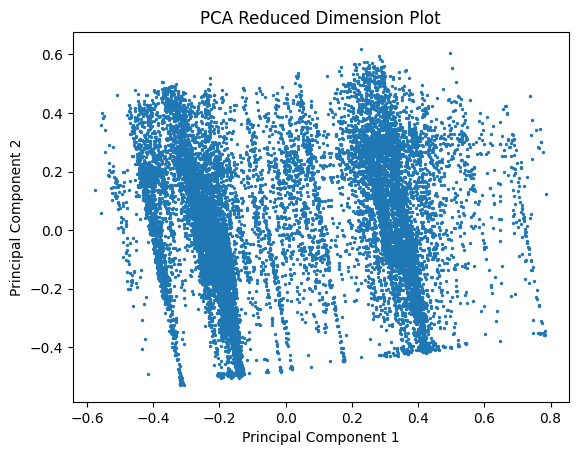

In [ ]:
# FILL IN THIS SECTION

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

print(f'Size of transformed X_train: {X_reduced.shape}')
plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=2)
plt.title('PCA Reduced Dimension Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Clustering can help us find groups in our data. K-means is a classis clustering algorithm that requires us to specify how many groups we expect to find.

In the code block below, fit the KMeans object to **X_train**. We will attempt to find two groups of data in the data. Predict a cluster assignment for each instance in X_train and store the result into a variable named **clusters**.

Number found in first cluster: 9603
Number found in second cluster: 6909


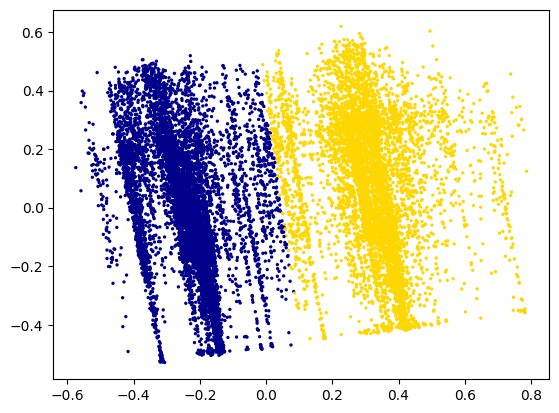

In [ ]:
# FILL IN THIS SECTION
kmeans = KMeans(n_clusters=2, n_init="auto")

# add your code here
# store your cluster assignments into a variable name 'clusters'
kmeans = KMeans(n_clusters=2, n_init="auto")
kmeans.fit(X_train)
clusters = kmeans.predict(X_train)

print('Number found in first cluster:', np.count_nonzero(clusters==0))
print('Number found in second cluster:', np.count_nonzero(clusters==1))
plt.figure()
colors = ['darkblue' if i==0 else 'gold' for i in clusters]
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors, s=2)
plt.show()

One frustrating thing clustering is that it finds groups, but it's up to us as analysts to interpret those groups. Write code to calculate the following values:

1.  cluster_0_med_inc -> the average median income of cluster 0
2.  cluster_1_med_inc -> the average median income of cluster 1
3.  cluster_0_pop -> the average city population in cluster 0
4.  cluster_1_pop -> the average city population in cluster 1
5.  cluster_0_num_room -> the average number of rooms in cluster 0
6.  cluster_1_num_room -> the average number of rooms in cluster 1
7.  cluster_0_hou_price -> the average house price of cluster 0
8.  cluster_1_hou_price -> the average house price of cluster 1

You'll have to use y_train to get home prices.



In [ ]:
# FILL IN THIS SECTION

# Calculate the average median income for each cluster
cluster_0_med_inc = np.mean(X_train[clusters == 0, features.index('MedInc')])
cluster_1_med_inc = np.mean(X_train[clusters == 1, features.index('MedInc')])

# Calculate the average population for each cluster
cluster_0_pop = np.mean(X_train[clusters == 0, features.index('Population')])
cluster_1_pop = np.mean(X_train[clusters == 1, features.index('Population')])

# Calculate the average number of rooms for each cluster
cluster_0_num_room = np.mean(X_train[clusters == 0, features.index('AveRooms')])
cluster_1_num_room = np.mean(X_train[clusters == 1, features.index('AveRooms')])

# Calculate the average house price for each cluster
cluster_0_hou_price = np.mean(y_train[clusters == 0])
cluster_1_hou_price = np.mean(y_train[clusters == 1])

print('Avg median neighborhood income in Cluster 0:', cluster_0_med_inc * maxes[0])
print('Avg median neighborhood income in Cluster 1:', cluster_1_med_inc * maxes[0])
print('Avg city population in Cluster 0:', cluster_0_pop * maxes[4])
print('Avg city population in Cluster 1:', cluster_1_pop * maxes[4])
print('Avg number of rooms in Cluster 0:', cluster_0_num_room * maxes[2])
print('Avg number of rooms in Cluster 1:', cluster_1_num_room * maxes[2])
print('Avg home price in Cluster 0:', cluster_0_hou_price*100000)
print('Avg home price in Cluster 1:', cluster_1_hou_price*100000)

Avg median neighborhood income in Cluster 0: 3.5255540587587553
Avg median neighborhood income in Cluster 1: 3.410360951055723
Avg city population in Cluster 0: 1517.3764555081768
Avg city population in Cluster 1: 1287.6186066484142
Avg number of rooms in Cluster 0: 4.422491936587709
Avg number of rooms in Cluster 1: 4.859283139780557
Avg home price in Cluster 0: 213365.64406956162
Avg home price in Cluster 1: 195977.73512809377


So now we can see that some variables are a bit different between the two clusters and some are really close. Let's print our 2-D projection again, but instead of coloring the data using our clusters we'll color the data using the target values (home price).

To do that we will have to "bin" the data, which means putting into 2 or more fixed ranges.

Shape of binned home prices: (16512,)


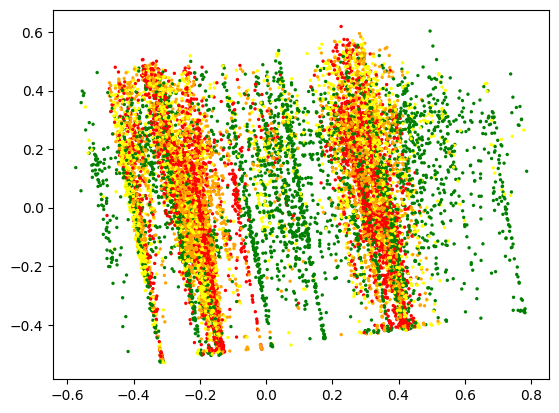

In [ ]:
# Do not change!
kbd = KBinsDiscretizer(n_bins=4, encode='ordinal')
y_binned = kbd.fit_transform(np.expand_dims(y_train, 1)).squeeze()
print('Shape of binned home prices:', y_binned.shape)

colors = ['green', 'yellow', 'orange', 'red']
c = [colors[int(i)] for i in y_binned]
plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=c, s=2)
plt.show()

Oops. It looks like the home prices are completely scatterd across our feature space. This suggests that the features in this dataset aren't good predictors of the home prices. But we can also see that there are some distinct "bands" of green (cheaper homes) and red (more expensive homes).

Let's try training a decision tree to predict home prices. The we will predict a price for every home in the test set.

In [ ]:
# Do not change!
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print('Shape of predicted prices:', y_pred.shape)

Shape of predicted prices: (4128,)


Our last task is to assess how well our classifier did.

Compute a Mean Squared Error between **y_pred** and **y_test** in the code block below.

In [ ]:
# FILL IN THIS SECTION
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error between y_pred and y_test
mse = mean_squared_error(y_test, y_pred)

print("MSE: ", mse)
print("Average difference between predicted and observed home price: $", np.sqrt(mse) * 100000)

MSE:  0.5128322399803052
Average difference between predicted and observed home price: $ 71612.30620363411
